In [1]:
import pandas as pd
import numpy as np
import nltk
 
import matplotlib.pyplot as plt 
#import googletrans
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import random
from nltk.corpus import movie_reviews

import pickle 
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode

In [2]:
#!pip install googletrans

In [3]:
#from wordcloud import WordCloud, STOPWORDS

In [5]:
df=pd.read_csv('data_natgeo.csv')

In [6]:
df.head(5)

,title,channel_title,desc,date,tags,liked,disliked,views
0,Olympic Training During a Pandemic | Podcast |...,National Geographic,It’s a dream years in the making. High jumper ...,2021-06-22T12:00:33Z,"['national geographic', 'nat geo', 'natgeo', '...",374,36,16399
1,The Murder of Carmine Galante | Narco Wars,National Geographic,From the 1950s to the 1970s Carmine Galante wa...,2021-06-20T17:00:09Z,"['national geographic', 'nat geo', 'natgeo', '...",822,31,29018
2,Save The Titanic With Bob Ballard (Full Episod...,National Geographic,100 years after the Titanic tragically sank on...,2021-06-20T17:00:00Z,"['national geographic', 'nat geo', 'natgeo', '...",2100,53,83202
3,Meth Hidden in a Spare Tire | To Catch A Smuggler,National Geographic,Customs and Border Patrol Agents stop a truck ...,2021-06-20T12:00:02Z,"['national geographic', 'nat geo', 'natgeo', '...",906,27,34054
4,Angkor Wat (Full Episode) | Access 360 World H...,National Geographic,Workers strive to save the temples of the Angk...,2021-06-19T17:00:08Z,"['national geographic', 'nat geo', 'natgeo', '...",4191,58,123801


In [7]:
df.shape

(1902, 8)

In [8]:
# tags wordcloud
tag_words = '' 
stopwords = set(STOPWORDS)
#print(stopwords)

In [9]:
# title wordcloud
title_words = ''

In [10]:
# iterate through the csv file 
for val in df.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    title_words += " ".join(tokens)+" "

In [11]:
val

'Enter the Fish Hawk | Wicked Tuna'

In [12]:
wordcloud_title = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(title_words) 

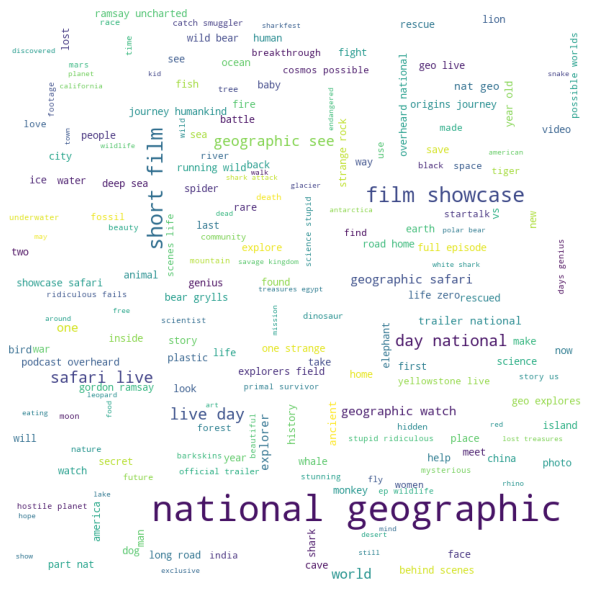

In [13]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_title) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [14]:
#word_data = df.title
#nltk_tokens = nltk.word_tokenize(word_data)  	

print(list(nltk.bigrams(df.tags))[:3])

[("['national geographic', 'nat geo', 'natgeo', 'animals', 'wildlife', 'science', 'explore', 'discover', 'survival', 'nature', 'culture', 'documentary', 'Olympics', 'Pandemic']", "['national geographic', 'nat geo', 'natgeo', 'animals', 'wildlife', 'science', 'explore', 'discover', 'survival', 'nature', 'culture', 'documentary', 'Carmine Galante', 'Narco Wars', 'Narcos', 'Narco', 'Crime Family', 'Crime Families']"), ("['national geographic', 'nat geo', 'natgeo', 'animals', 'wildlife', 'science', 'explore', 'discover', 'survival', 'nature', 'culture', 'documentary', 'Carmine Galante', 'Narco Wars', 'Narcos', 'Narco', 'Crime Family', 'Crime Families']", "['national geographic', 'nat geo', 'natgeo', 'animals', 'wildlife', 'science', 'explore', 'discover', 'survival', 'nature', 'culture', 'documentary', 'The Sinking of the Titanic', 'Titanic', 'The Titanic', 'Bob Ballard', 'Nat Geo Documentary', 'Full Episode']"), ("['national geographic', 'nat geo', 'natgeo', 'animals', 'wildlife', 'scienc

In [15]:
print(list(nltk.bigrams(df.title))[:3])

[('Olympic Training During a Pandemic | Podcast | Overheard at National Geographic', 'The Murder of Carmine Galante | Narco Wars'), ('The Murder of Carmine Galante | Narco Wars', 'Save The Titanic With Bob Ballard (Full Episode) | National Geographic'), ('Save The Titanic With Bob Ballard (Full Episode) | National Geographic', 'Meth Hidden in a Spare Tire | To Catch A Smuggler')]


In [16]:
print(title_words[:20])

olympic training dur


In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
tokenized_title=word_tokenize(title_words)
print(tokenized_title[:10])

['olympic', 'training', 'during', 'a', 'pandemic', '|', 'podcast', '|', 'overheard', 'at']


In [19]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_title)
print(fdist)

<FreqDist with 4008 samples and 20752 outcomes>


In [20]:
fdist.most_common(5)

[('|', 1951),
 ('national', 1162),
 ('geographic', 1157),
 ('the', 750),
 ('of', 438)]

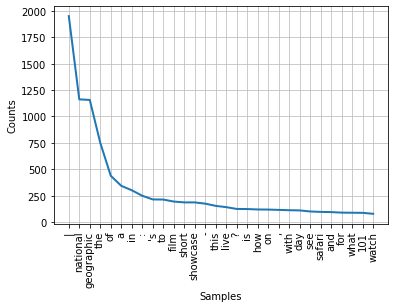

In [21]:
# Frequency Distribution Plot - TITLE
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

TITLE COLUMNS

In [22]:
type(df.title[0])

str

In [23]:
df.title[0]

'Olympic Training During a Pandemic | Podcast | Overheard at National Geographic'

In [24]:
#words = 'word1 word2 word3 word4, word5'
replace_list = ['National Geographic', '|', 'natgeo', 'nat geo','Nat Geo', 'NatGeo','Film','film','short','Short','Showcase']

def remove_multiple_strings(cur_string, replace_list):
  for cur_word in replace_list:
    cur_string_2 = cur_string.replace(cur_word, '')
  return cur_string_2


In [25]:
df['filtered_title']=np.empty((len(df), 0)).tolist()

In [26]:
df.head(5)

,title,channel_title,desc,date,tags,liked,disliked,views,filtered_title
0,Olympic Training During a Pandemic | Podcast |...,National Geographic,It’s a dream years in the making. High jumper ...,2021-06-22T12:00:33Z,"['national geographic', 'nat geo', 'natgeo', '...",374,36,16399,[]
1,The Murder of Carmine Galante | Narco Wars,National Geographic,From the 1950s to the 1970s Carmine Galante wa...,2021-06-20T17:00:09Z,"['national geographic', 'nat geo', 'natgeo', '...",822,31,29018,[]
2,Save The Titanic With Bob Ballard (Full Episod...,National Geographic,100 years after the Titanic tragically sank on...,2021-06-20T17:00:00Z,"['national geographic', 'nat geo', 'natgeo', '...",2100,53,83202,[]
3,Meth Hidden in a Spare Tire | To Catch A Smuggler,National Geographic,Customs and Border Patrol Agents stop a truck ...,2021-06-20T12:00:02Z,"['national geographic', 'nat geo', 'natgeo', '...",906,27,34054,[]
4,Angkor Wat (Full Episode) | Access 360 World H...,National Geographic,Workers strive to save the temples of the Angk...,2021-06-19T17:00:08Z,"['national geographic', 'nat geo', 'natgeo', '...",4191,58,123801,[]


In [27]:
#removing stopwords from TITLE
#for i in range(len(df.title)):
    # typecaste each val to string 
#    row = df.title[i]
#    df.filtered_title[i]=remove_multiple_strings(row, replace_list)

In [28]:
import re

In [29]:
#re.sub(r'|'.join(map(re.escape, replace_list)), '', row)

for i in range(len(df.title)):
    # typecaste each val to string 
    row = df.title[i]
    #df.filtered_title[i]=remove_multiple_strings(row, replace_list)
    df.filtered_title[i]=re.sub(r'|'.join(map(re.escape, replace_list)), '', row)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [30]:
df.filtered_title[0]

'Olympic Training During a Pandemic  Podcast  Overheard at '

In [31]:
df.head(5)

,title,channel_title,desc,date,tags,liked,disliked,views,filtered_title
0,Olympic Training During a Pandemic | Podcast |...,National Geographic,It’s a dream years in the making. High jumper ...,2021-06-22T12:00:33Z,"['national geographic', 'nat geo', 'natgeo', '...",374,36,16399,Olympic Training During a Pandemic Podcast O...
1,The Murder of Carmine Galante | Narco Wars,National Geographic,From the 1950s to the 1970s Carmine Galante wa...,2021-06-20T17:00:09Z,"['national geographic', 'nat geo', 'natgeo', '...",822,31,29018,The Murder of Carmine Galante Narco Wars
2,Save The Titanic With Bob Ballard (Full Episod...,National Geographic,100 years after the Titanic tragically sank on...,2021-06-20T17:00:00Z,"['national geographic', 'nat geo', 'natgeo', '...",2100,53,83202,Save The Titanic With Bob Ballard (Full Episod...
3,Meth Hidden in a Spare Tire | To Catch A Smuggler,National Geographic,Customs and Border Patrol Agents stop a truck ...,2021-06-20T12:00:02Z,"['national geographic', 'nat geo', 'natgeo', '...",906,27,34054,Meth Hidden in a Spare Tire To Catch A Smuggler
4,Angkor Wat (Full Episode) | Access 360 World H...,National Geographic,Workers strive to save the temples of the Angk...,2021-06-19T17:00:08Z,"['national geographic', 'nat geo', 'natgeo', '...",4191,58,123801,Angkor Wat (Full Episode) Access 360 World He...


In [32]:
df.tail(5)

,title,channel_title,desc,date,tags,liked,disliked,views,filtered_title
1897,Mooch of the Penguins: Juvenile Won't Stop Beg...,National Geographic,This recently fledged penguin chick won't quit...,2017-03-13T15:00:03Z,"['penguins', 'penguin chicks', 'juvenile', 'ga...",277,3,17558,Mooch of the Penguins: Juvenile Won't Stop Beg...
1898,Spend a Day With the World’s Only Grass-Eating...,National Geographic,"Spend a day with geladas monkeys, one of the f...",2017-03-13T12:00:04Z,"['gelada monkeys', 'geladas', 'monkeys', 'prim...",980,14,50334,Spend a Day With the World’s Only Grass-Eating...
1899,Train Surfing: One Mistake and This Illegal 'S...,National Geographic,Watch India’s train surfers tempt fate with hi...,2017-03-12T17:00:00Z,"['train surfing', 'surfers', 'dangerous', 'stu...",19951,5229,2194503,Train Surfing: One Mistake and This Illegal 'S...
1900,The Global Economic Trends Post-Election | Exp...,National Geographic,Explorer Correspondent Ryan Duffy talks with N...,2017-03-12T12:00:04Z,"['Explorer', 'national geographic', 'wild', 'n...",133,43,6697,The Global Economic Trends Post-Election Expl...
1901,Enter the Fish Hawk | Wicked Tuna,National Geographic,"Meet the fleet’s newest vessel, captained by t...",2017-03-12T00:00:01Z,"['Wicked Tuna', 'The First Fish', 'Is The Hard...",520,37,102104,Enter the Fish Hawk Wicked Tuna


In [33]:
df.to_csv('data_natgeo_2.csv',index=False )